In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

%matplotlib inline

In [3]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [6]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [10]:
df[target]

0      1
1      2
2      1
3      1
4      2
5      1
6      1
7      1
8      1
9      2
10     2
11     2
12     1
13     2
14     1
15     2
16     1
17     1
18     2
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     2
      ..
970    1
971    1
972    2
973    2
974    1
975    1
976    1
977    1
978    2
979    2
980    2
981    2
982    1
983    2
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    2
999    1
Name: default, Length: 1000, dtype: int64

In [9]:
preprocessing.LabelEncoder().fit_transform(df[target])

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [30]:
%%time 

target = "default"
X = df.copy()
del X[target]
y = preprocessing.LabelEncoder().fit_transform(df[target])

# Convert the categorical features into one hot encoded values 
X_dummy = pd.get_dummies(X, drop_first=True)

# Split the data into training and test bucket
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X_dummy, y
        , test_size = 0.3, random_state = 1985)

# Build a pipeline for data preparation and model building
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2
                            , include_bias=False)),
    #("pca", decomposition.PCA(n_components=80)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(random_state=1, alpha=2.0
                        , max_iter=1000))
])

# Perform training
pipe.fit(X_train, y_train)

# Make infereneces
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("Training\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_train, y_train_pred),
metrics.precision_score(y_train, y_train_pred), 
metrics.recall_score(y_train, y_train_pred)))

print("\nTest\naccuracy: %f\nprecision: %f\nrecall: %f" % 
(metrics.accuracy_score(y_test, y_test_pred),
metrics.precision_score(y_test, y_test_pred), 
metrics.recall_score(y_test, y_test_pred)))

Training
accuracy: 0.821429
precision: 0.887931
recall: 0.479070

Test
accuracy: 0.750000
precision: 0.625000
recall: 0.294118
CPU times: user 1.84 s, sys: 34.9 ms, total: 1.87 s
Wall time: 1.67 s


(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1c923c88>)

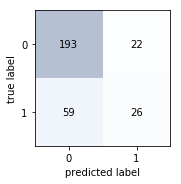

In [24]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [25]:
len(y_test)

300